## EXERCICE SUR LES SERIES TEMPORELLES

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as num


In [2]:
data=pd.read_csv("./jeu_de_donnée/jeu_data2.csv")

In [3]:
data.head(7)

,Year,Total
0,2019,34.52
1,2018,55.97
2,2017,36.62
3,2016,35.48
4,2015,62.61
5,2014,21.32
6,2013,29.40


## valeur statisque

In [4]:
data["Total"].describe()

count    121.000000
mean      33.327769
std        9.186430
min       17.910000
25%       26.440000
50%       33.140000
75%       39.290000
max       62.610000
Name: Total, dtype: float64

In [6]:
moyenne=num.mean(data["Total"])
print('moyenne', moyenne)
variance=num.std(data["Total"])**2
print('variance',variance)
ecart_type=num.std(data["Total"])
print('ecart-type', ecart_type)

moyenne 33.32776859504133
variance 83.69304873984018
ecart-type 9.14839049996447


## Representation de la serie temporelle

In [7]:
data.dropna(inplace=True)
#suppression des valeurs manquantes

Text(0, 0.5, 'valeur')

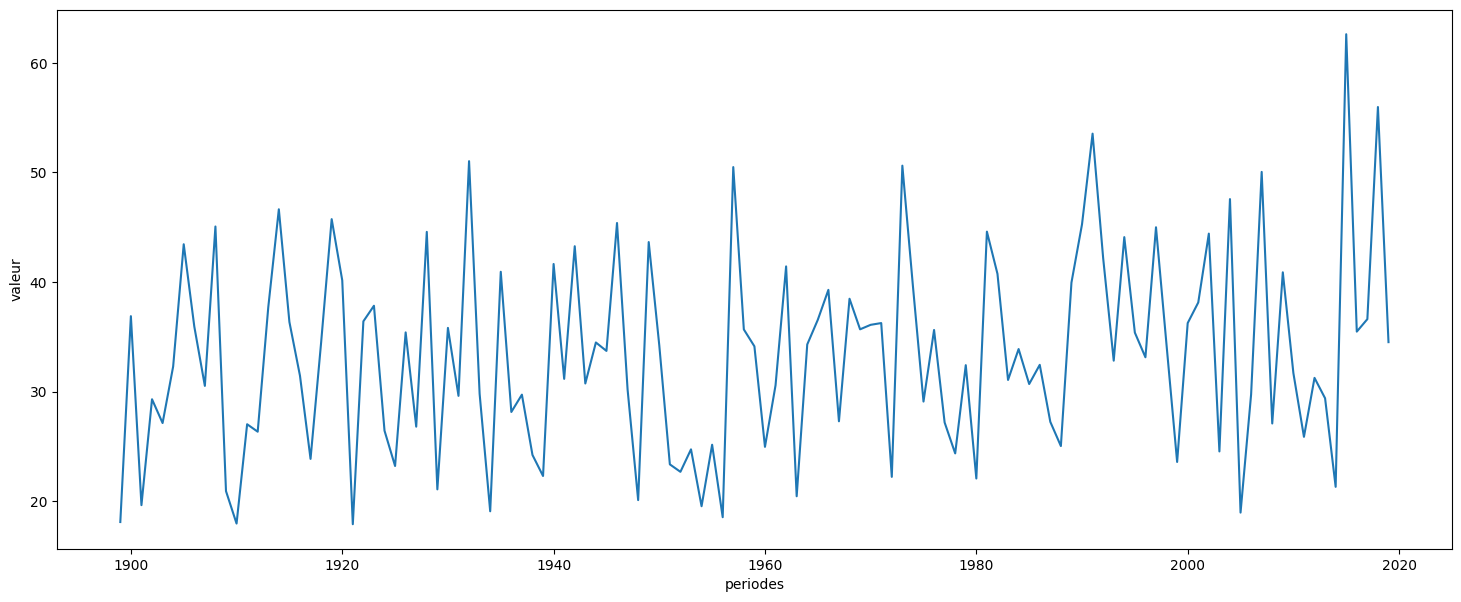

In [9]:
plot.figure(figsize=[18,7])
plot.plot(data["Year"],data["Total"])
#plot.xlim(0,64)
plot.xlabel("periodes")
plot.ylabel("valeur")

## Différents nuages de point

In [22]:
#N=1: (0-62)(1,63)
#sur les revenues

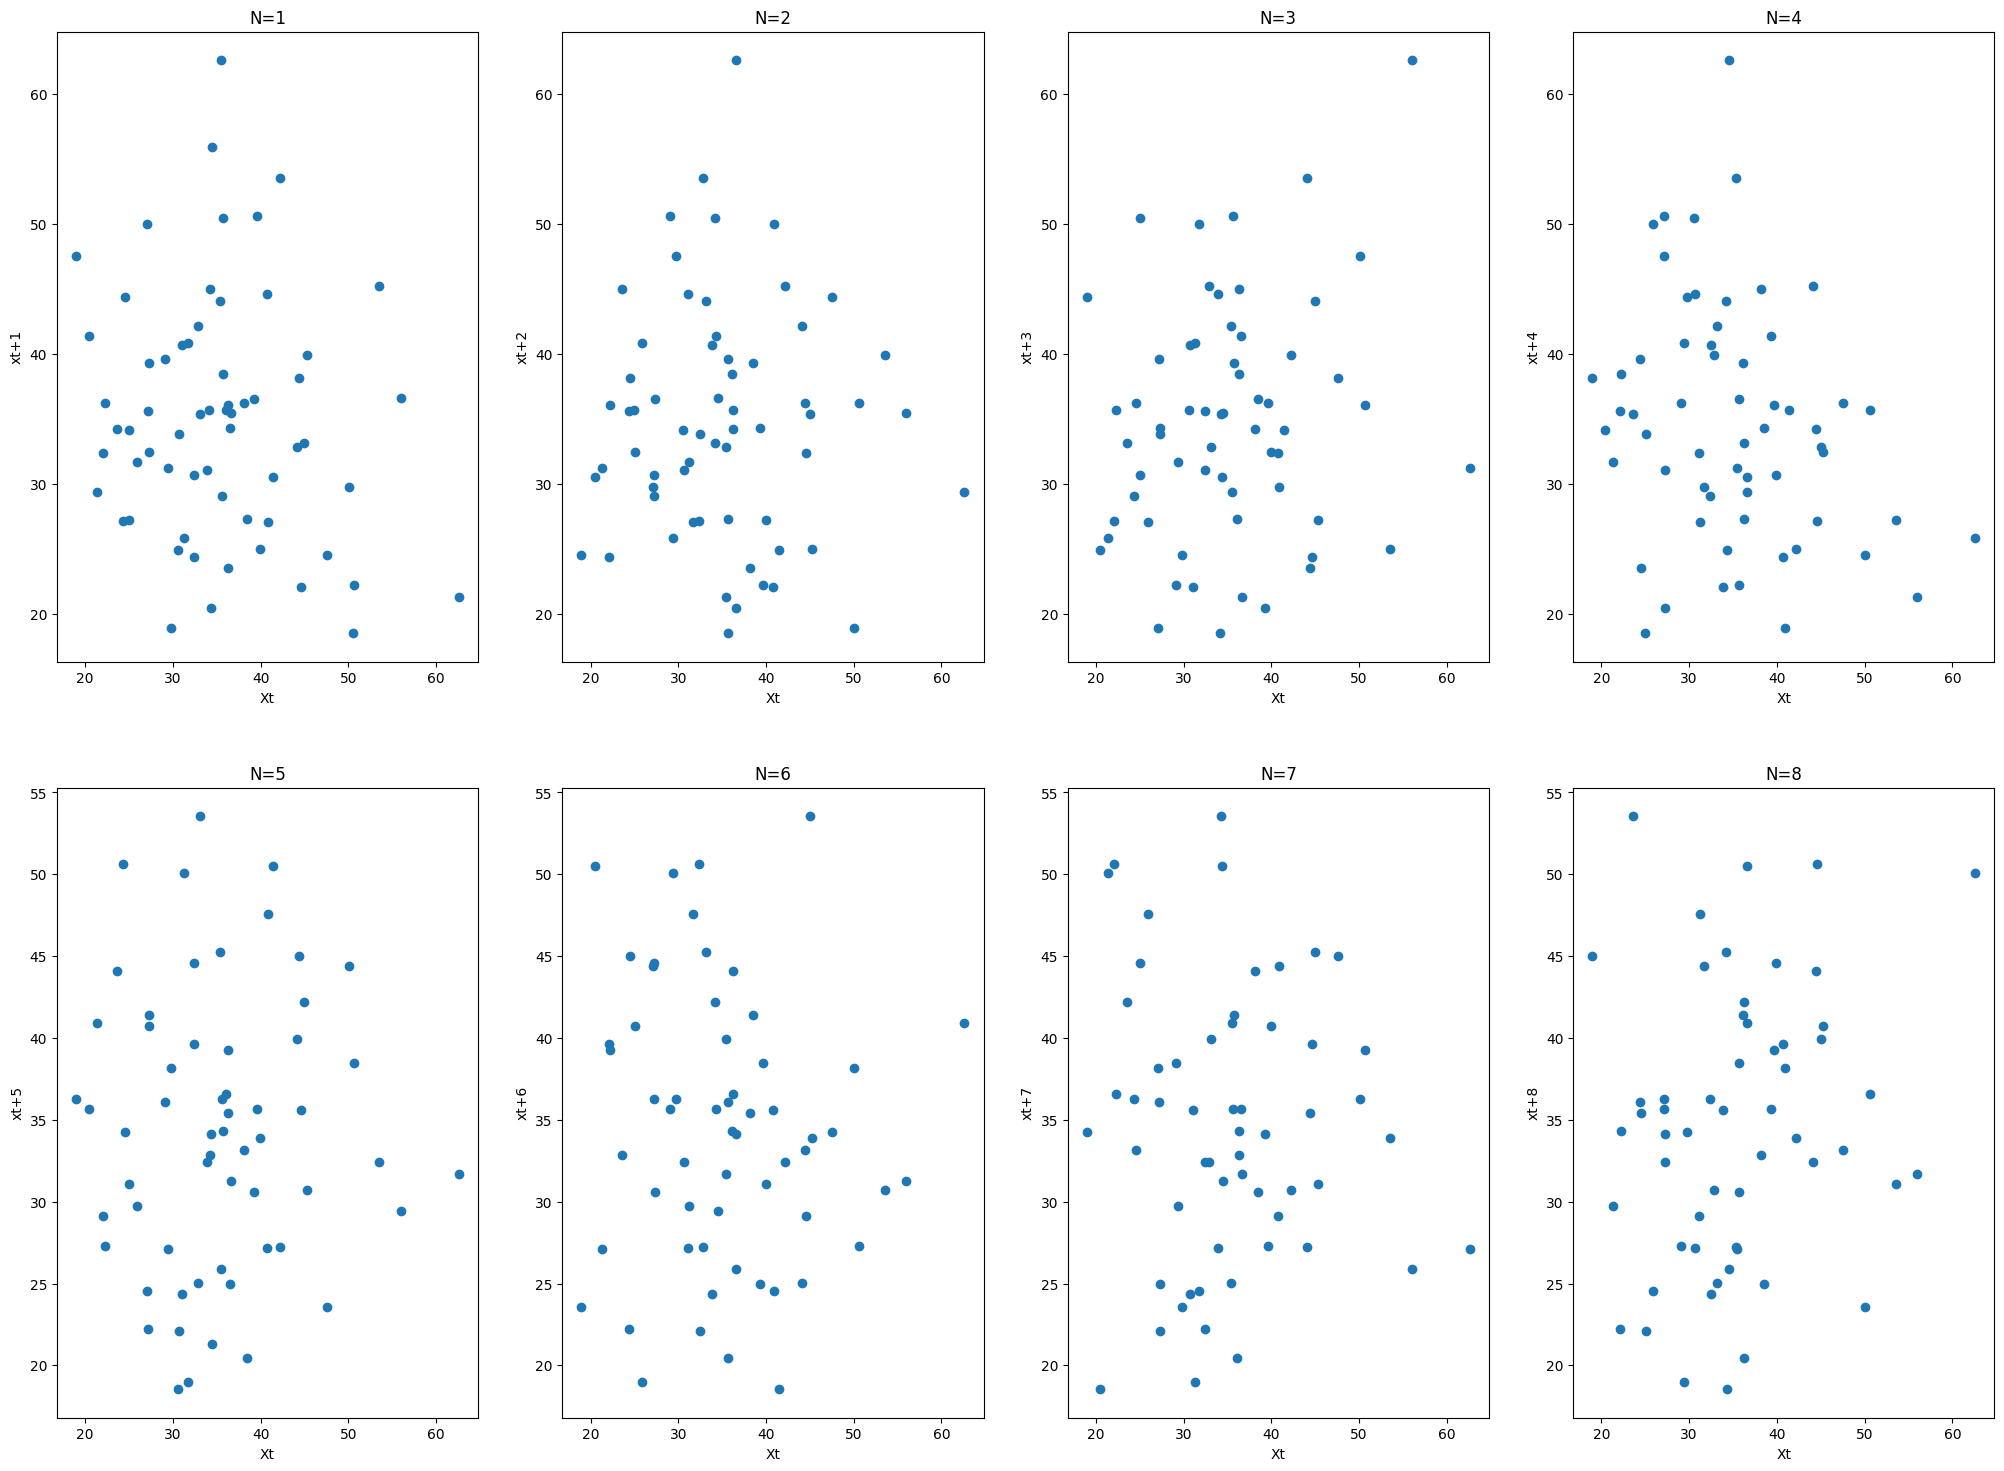

In [10]:
plot.figure(figsize=[25,18])
for N in range(1,9):
    plot.subplot(2,4,N)
    debut=0
    fin=64
    plot.title(f"N={N}")
    plot.xlabel("Xt")
    plot.ylabel(f"xt+{N}")
    plot.scatter(data["Total"][debut:fin-N],data["Total"][debut+N:fin])
    

## Représenter la courbe des auto-corrélations ρ̂n (k) avec
## k = 1...50 (50 valeurs de k)

In [11]:
moy=num.mean(data["Total"])

In [12]:
def auto_cov(data,k,moy):
    debut=0
    fin=len(data)
    xt=data[debut:fin-k]
    xt_k=data[debut+k:fin]
    cov=0
    for i in range(0,fin-k):
        cov=cov+(xt[i]-moy)*(xt_k[i]-moy)
        #calcul de L’auto-covariance empirique
    return (cov/(fin-k))

In [13]:
def auto_corr(data,k,moy):
    cov_0=auto_cov(data,0,moy)
    cov_k=auto_cov(data,k,moy)
    return (cov_k/cov_0)

In [14]:
correlation_k=[]
d=list(data["Total"])
for cov in range (1,51):
    res=auto_corr(d,cov,moy)
    correlation_k.append(res)
    

<BarContainer object of 50 artists>

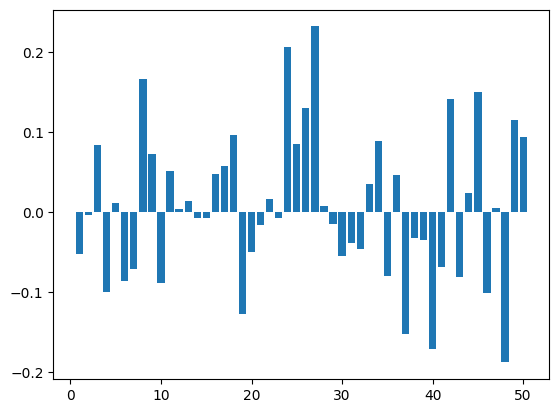

In [15]:
views=[i for i in range(1,51)]
plot.bar(views,correlation_k)